Estimated (mu1, sigma1): (0.23211729195978908, 0.9744857696363143), (mu2, sigma2): (0.3628149847257224, 0.9020317084406986), (mu3, sigma3): (0.4573559461426215, 1.1222000979197277)


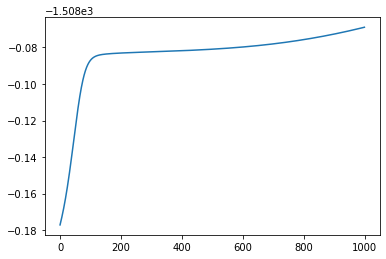

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# set random seed so that everytime we get the same result
np.random.seed(1)

# prepare simulation data
N1 = 1000
N2 = 1000
N3 = 1000
N = N1 + N2 + N3
real_mu1 = 0.2
real_std1 = 1
real_mu2 = 0.5
real_std2 = 1
real_mu3 = 0.3
real_std3 = 1
y = np.concatenate((np.random.normal(real_mu1, real_std1, N1), np.random.normal(real_mu2, real_std2, N2), np.random.normal(real_mu3, real_std3, N3)))


# EM algorithm

# Initialization
nits = 1000
count = 0 # should be initialized as 0
p1 = 0.33
p2 = 0.33
p3 = 0.34
mu1 = np.random.random()
mu2 = np.random.random()
mu3 = np.random.random()
s1 = np.std(y)
s2 = s1
s3 = s1
ll = np.zeros(nits)
gamma1 = np.zeros(N)
gamma2 = np.zeros(N)
gamma3 = np.zeros(N)
pi = 3.14159

while count < nits:
    count = count + 1
    # E-step
    for i in range(N):
        num1 = p1 * np.exp(-(y[i]-mu1)**2/(2*s1)) / np.sqrt(2 * pi * s1) 
        num2 = p2 * np.exp(-(y[i]-mu2)**2/(2*s2)) / np.sqrt(2 * pi * s2)
        num3 = p3 * np.exp(-(y[i]-mu3)**2/(2*s3)) / np.sqrt(2 * pi * s3)
        gamma1[i] = num1 / (num1 + num2 + num3)
        gamma2[i] = num2 / (num1 + num2 + num3)
        gamma3[i] = num3 / (num1 + num2 + num3)
    # M-step
    mu1 = np.sum(gamma1*y) / np.sum(gamma1)
    mu2 = np.sum(gamma2*y) / np.sum(gamma2)
    mu3 = np.sum(gamma3*y) / np.sum(gamma3)
    s1 = np.sum(gamma1*(y-mu1)**2) / np.sum(gamma1)
    s2 = np.sum(gamma2*(y-mu2)**2) / np.sum(gamma2)
    s3 = np.sum(gamma3*(y-mu3)**2) / np.sum(gamma3)
    p1 = np.sum(gamma1) / N
    p2 = np.sum(gamma2) / N
    p3 = np.sum(gamma3) / N
    ll[count - 1] = np.sum(np.log(p1*np.exp(-(y-mu1)**2/(2*s1)) / np.sqrt(s1) + p2*np.exp(-(y-mu2)**2/(2*s2)) / np.sqrt(s2) + p3*np.exp(-(y-mu3)**2/(2*s3)) / np.sqrt(s3)))
    
    
print('Estimated (mu1, sigma1): (%s, %s), (mu2, sigma2): (%s, %s), (mu3, sigma3): (%s, %s)' % (mu1, s1, mu2, s2, mu3, s3))     
plt.plot(range(nits), ll)
for i in range(0, nits - 1):
  if ll[i] > ll[i + 1]:
    print("Log-likelihood went down... that's not supposed to happen!")

#Homework 1 Question 5

###Changes:

1.   Added a third set of all variables to represent the 3rd Gaussian model
2.   Changed the probabilities `p1`, `p2`, `p3`, and values of `mu1`, `mu2`, and `mu3` such that their new sum is 1
3.   Multiplied the values of `num1`, `num2`, and `num3` by `1 / sqrt(2 * pi)`

###Results:

*   The estimated values for μ and σ were relatively close to the real values
  * `Estimated (mu1, sigma1): (0.23211729195978908, 0.9744857696363143)`
  * `Estimated (mu2, sigma2): (0.3628149847257224, 0.9020317084406986)`
  * `Estimated (mu3, sigma3): (0.4573559461426215, 1.1222000979197277)`
*   The log-likelihood curve is always increasing, and it increases more sharply than the 2-class EM implementation from `count = 0` to `count = 150`

###Log-likelihood curve:

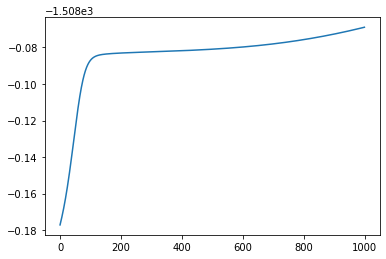





